In [1]:
# import libraries
import MDAnalysis as mda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MDAnalysis.analysis.dihedrals as dih

In [2]:
import seaborn as sns
palette = sns.color_palette(None, 162)

In [3]:
## CAUTION: Only works for normal residue proteins! ncAA's need a special dihedral definition (defined in the wiki!)
u = mda.Universe("md_0_1.gro", "md_0_1.xtc")

In [25]:
r = dih.Ramachandran(u.select_atoms('protein')).run()
R_angletable = r.angles
#phis = R_angletable[:,:,0]       # extract phi angles (?)
#psis = R_angletable[:,:,1]       # extract psi angles (?)

residue1 = R_angletable[:,0,:]      # extract all angle pairs for one residue

delres = np.diff(residue1, axis=0)

#delphi = np.diff(phis)      # calculate delta phi array
#delpsi = np.diff(psis)      # calculate delta psi array

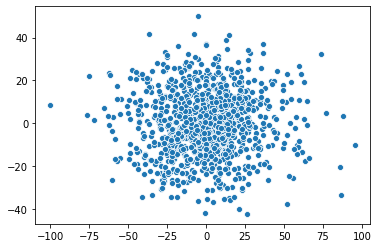

In [26]:
# scatterplot of these differentials
#plt.scatter(delphi,delpsi,marker='x')
#sns.scatterplot(x=delres[:,1],y=delres[:,1])
sns.scatterplot(x=delres[:,0],y=delres[:,1])

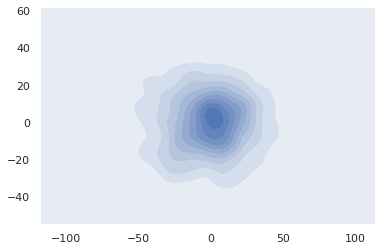

In [31]:
# generate a kde plot
sns.set(style="dark")
sns.kdeplot(data=delres[:,0], data2=delres[:,1], shade=True)